In [1]:
import pandas as pd
print(pd.__version__)

FILE_PATH = 'material/dados.csv'

df        = pd.read_csv(FILE_PATH)
df.head(5)

2.2.0


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [2]:
df.shape[0]

76840

In [3]:
df['Renda'].mean()

2000.3831988547631

In [4]:
amostra = df.sample(n = 100, random_state= 101)
amostra.shape[0]

100

In [5]:
amostra['Renda'].mean()

2150.85

In [6]:
df['Sexo'].value_counts(normalize=True) * 100

Sexo
0    69.299844
1    30.700156
Name: proportion, dtype: float64

In [7]:
amostra['Sexo'].value_counts(normalize=True) * 100

Sexo
0    69.0
1    31.0
Name: proportion, dtype: float64

In [8]:
n_linhas  = 2000
total_col = 1500
amostras  = pd.DataFrame()
for i in range(total_col):
  _ = df['Idade'].sample(n_linhas)
  _.index = range(0, len(_))
  amostras['Amostra_' + str(i)] = _

amostras

C:\Users\jeanl\AppData\Local\Temp\ipykernel_17324\2772794658.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\jeanl\AppData\Local\Temp\ipykernel_17324\2772794658.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\jeanl\AppData\Local\Temp\ipykernel_17324\2772794658.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,36,40,58,58,30,35,46,52,40,57,...,33,42,38,51,44,44,64,52,23,74
1,49,40,55,31,49,37,28,36,69,48,...,40,29,43,33,33,38,26,50,71,30
2,23,34,43,33,54,33,57,43,59,51,...,44,38,41,34,46,31,32,53,57,49
3,21,54,66,31,41,50,57,59,32,47,...,36,74,34,48,29,34,39,22,46,62
4,42,59,60,41,46,49,67,32,56,60,...,51,30,29,32,61,24,41,41,46,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,60,35,29,32,33,50,27,51,57,23,...,36,50,52,37,69,65,64,30,40,48
1996,36,31,76,29,52,49,59,50,37,59,...,49,42,62,28,35,36,31,39,34,40
1997,47,74,56,62,34,60,43,46,58,37,...,27,42,45,28,39,41,46,46,33,45
1998,42,30,24,59,47,35,33,55,49,64,...,52,51,24,63,48,44,50,25,56,59


In [9]:
amostras.mean()

Amostra_0       43.9530
Amostra_1       44.4020
Amostra_2       44.2990
Amostra_3       44.3645
Amostra_4       44.1860
                 ...   
Amostra_1495    44.5595
Amostra_1496    44.0530
Amostra_1497    44.2455
Amostra_1498    44.2690
Amostra_1499    44.0275
Length: 1500, dtype: float64

<Axes: >

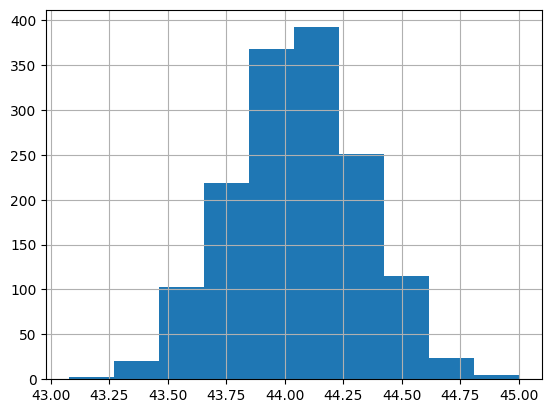

In [10]:
amostras.mean().hist()

In [11]:
df['Idade'].mean()

44.07142113482561

In [12]:
# amostras.mean().mean()
mean_age = amostras.mean()
mean_age.mean()

44.05609200000001

In [13]:
df['Idade'].std()

12.48058346535974

In [14]:
import numpy as np

df['Idade'].std() / np.sqrt(n_linhas)

0.27907433027404266

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um **intervalo de confiança para a média populacional** assumindo um **nível de significância de 5%**.

In [15]:
from scipy.stats import norm

# Operações inversas -> 'cdf' vs 'ppf'
prob = norm.cdf(1.96)
z    = norm.ppf(prob)
prob, z

(0.9750021048517795, 1.959999999999999)

In [16]:
pm = 5050 # Peso médio
dp = 150 # Desvio padrão
n  = 20 # Quantidade de sacos
rn = np.sqrt(n) # Raíz de 'n'

In [17]:
# Aplicação das fórmulas

sigma = dp / rn
e     = z * sigma
e

65.74039853849378

In [18]:
intervalo_de_confianca = (
  pm - e,
  pm + e
)
intervalo_de_confianca

(4984.2596014615065, 5115.7403985384935)

In [21]:
norm.interval(confidence=0.95, loc=pm, scale=sigma)

(4984.260809456757, 5115.739190543243)

Para estimar o valor médio gasto por cada cliente de uma grande rede de fast-food, foi selecionada uma amostra de 50 clientes.

Assumindo que o valor do desvio padrão da população seja de R$ 6,00 e que esta população se distribui normalmente, obtenha a margem de erro desta estimativa para um nível de confiança de 95%.

In [25]:
dp = 6
n  = 50
rn = np.sqrt(n)
z  = norm.ppf(0.975) # Or 1.96

In [26]:
sigma = dp / rn
e     = z * sigma
e

1.6630845892196133

Uma amostra aleatória simples de 1976 itens de uma população normalmente distribuída, com desvio padrão populacional igual a 11, resultou em uma média amostral de 28.

Qual o intervalo de confiança de 90% para a média populacional?

In [34]:
mean = 28
dp   = 11
n    = 1976
rn   = np.sqrt(n)
z    = norm.ppf(0.9 + (0.1 / 2))
z

1.6448536269514733

In [35]:
sigma = dp / rn
e     = z * sigma
e

0.40703004864353415

In [36]:
intervalo = (
  mean - e,
  mean + e
)
intervalo

(27.592969951356466, 28.407030048643534)

In [37]:
norm.interval(confidence=0.90, loc=mean, scale=sigma)

(27.592969951356466, 28.407030048643534)